# Chapter 4: Optimisation

**Mathematics for Machine Learning (2025)**
Teaching Team

Lecturers: 
- Eleonora Giunchiglia (Department of Electrical and Electronic Engineering)
- Felipe Tobar (Department of Mathematics)

Graduate Teaching Assistants (GTAs)
- Camilo Carvajal Reyes (Department of Mathematics)
- Joshua Ong (Department of Electrical and Electronic Engineering)

## Optimisation examples in machine learning

### 1. Linear regression

\begin{align}
  f \colon \mathbb{R}^M &\to \mathbb{R} \nonumber\\
  x &\mapsto f(x)=a^\top x + b,\quad a\in\mathbb{R}^M,b\in\mathbb{R}
\end{align}

conditional to a set of observations

\begin{equation}
	\mathcal{D} =\{(x_i,y_i)\}_{i=1}^N\subset \mathbb{R}^M \times \mathbb{R}.
\end{equation}
 Using least squares, the function $f$ is chosen via minimisation of the sum of the square differences between observations $\{y_i\}_{i=1}^N$ and predictions $\{f(x_i)\}_{i=1}^N$. That is, we aim to minimise he loss:
\begin{equation}
	J(\mathcal{D},f) = \sum_{i=1}^N(y_i-f(x_i))^2 = \sum_{i=1}^N(y_i-a^
	\top x_i - b)^2.
\end{equation}

In [1]:
# Loading data
import numpy as np

data = np.loadtxt('./data/crickets.csv', delimiter=',')

X = data[:, 0]
Y = data[:, 1]

In [2]:
# adding ones to X
X_tilda = np.vstack((X, np.ones(len(X))))
# inverse
XX_inv = np.linalg.inv(X_tilda.dot(X_tilda.T))
# optimal weights
w_opt = Y.dot(X_tilda.T).dot(XX_inv)

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams.update({
    "font.size": 15,
    "axes.labelsize": 15,
    "axes.titlesize": 18,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "legend.fontsize": 15,
    "font.family": "serif",
})

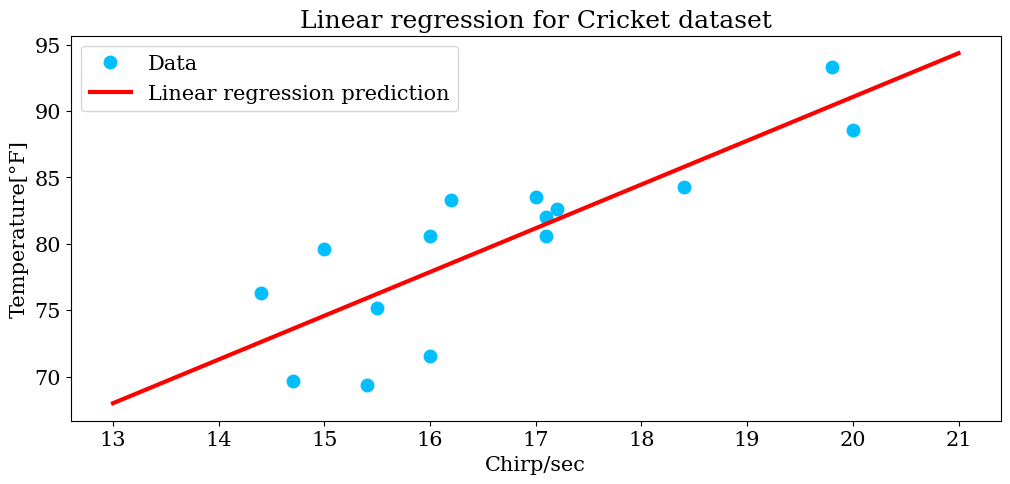

In [4]:
# query/prediccion
X_tilda_reg = np.vstack((np.linspace(13, 21, 9), np.ones(9)))

# plot 
plt.plot(X, Y, 'o', c='#00BFFF',ms=9, label='Data')
plt.plot(X_tilda_reg[0, :], w_opt.dot(X_tilda_reg), 'r', lw=3, label='Linear regression prediction')
plt.legend()
plt.xlabel('Chirp/sec')
plt.ylabel('Temperature[°F]')
plt.title('Linear regression for Cricket dataset')
plt.savefig("../img/optimisation_example_lr_crickets.pdf");

### 2. Logistic regression

In logistic regression, we aim to determine the function
\begin{align}
  f \colon \mathbb{R}^M &\to \mathbb{R}\nonumber\\
  x &\mapsto f(x)= \frac{1}{1 + e^{-\theta^\top x+b}},\quad \theta\in\mathbb{R}^M, b\in\mathbb{R}
\end{align}
conditional to the  observations $\mathcal{D} = \{(x_i,c_i)\}_{i=1}^N\subset \mathbb{R}^M \times \{0,1\}$.

The standard loss function for the classification problem is the cross entropy, given by:
\begin{align}
	J(\theta,b) &= \frac{1}{N} \sum_{i=1}^N \left( \log(1+e^{-\theta^\top x+b}) -y_i(-\theta^\top x+b)  \right)
\end{align}

In [5]:
# Generate Gaussian samples
np.random.seed(42)
n_samples = 200

mean0 = np.array([0, 0])
cov0 = np.array([[1.0, 0.3], [0.3, 1.0]])

mean1 = np.array([2, 2])
cov1 = np.array([[1.0, -0.4], [-0.4, 1.0]])

X0 = np.random.multivariate_normal(mean0, cov0, n_samples)
X1 = np.random.multivariate_normal(mean1, cov1, n_samples)

X = np.vstack((X0, X1))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

In [6]:
# Define loss and gradient
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_and_grad(theta, b, X, y):
    N = X.shape[0]
    z = X @ theta + b
    p = sigmoid(z)
    # Loss
    J = (1 / N) * np.sum(np.log(1 + np.exp(-z)) - y * (-z))
    # Gradients
    grad_theta = (1 / N) * (X.T @ (p - y))
    grad_b = (1 / N) * np.sum(p - y)
    return J, grad_theta, grad_b

In [7]:
# Gradient descent optimization
theta = np.zeros(X.shape[1])
b = 0.0
lr = 0.1
max_iter = 1000
tol = 1e-6

for i in range(max_iter):
    J, grad_theta, grad_b = loss_and_grad(theta, b, X, y)
    theta_new = theta - lr * grad_theta
    b_new = b - lr * grad_b
    if np.linalg.norm(theta_new - theta) < tol:
        break
    theta, b = theta_new, b_new

print(f"Converged after {i+1} iterations")
print("θ =", theta)
print("b =", b)
print("Final loss =", J)

Converged after 1000 iterations
θ = [1.74808537 1.69393132]
b = -3.5755147785705343
Final loss = 3.6069430694032674


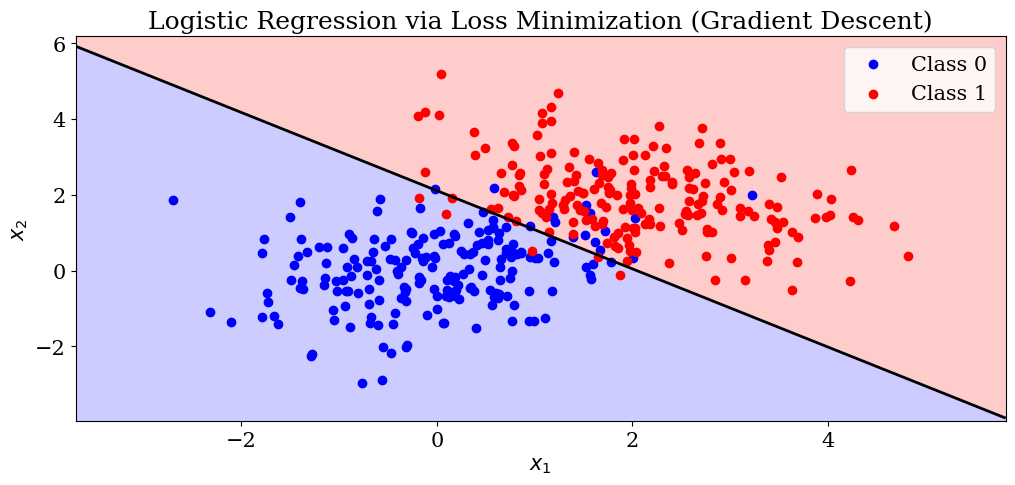

In [8]:
# Plot results
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = sigmoid(xx * theta[0] + yy * theta[1] + b)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=["blue", "red"])
plt.contour(xx, yy, Z, levels=[0.5], colors="k", linewidths=2)

plt.scatter(X0[:, 0], X0[:, 1], color="blue", label="Class 0")
plt.scatter(X1[:, 0], X1[:, 1], color="red", label="Class 1")

plt.title("Logistic Regression via Loss Minimization (Gradient Descent)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.savefig("../img/optimisation_example_logreg.pdf");

### 3. Clustering (K-means)

Given N observations in $\mathbb{R}^m$, we aim to find cluster centres (or prototypes) $\mu = \mu_1,\mu_2,\ldots, \mu_K$ and _assignment variables_ $r = \{r_{ik}\}_{i,k=1}^{N,K}$, to minimise the following loss 
\begin{equation}
	J(\mu,r) = \sum_{i=1}^N\sum_{k=1}^K r_{ik} ||x_i-\mu_k||^2
\end{equation}

In [9]:
# Minimising J with a coordinate descent method
def kmeans(X, K=2, max_iter=100, tol=1e-6):
    N = X.shape[0]
    # Randomly initialize centroids (choose K random points)
    rng = np.random.default_rng(0)
    mu = X[rng.choice(N, K, replace=False)]

    for iteration in range(max_iter):
        # E-step: assign points to nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - mu[np.newaxis, :, :], axis=2)
        r = np.argmin(distances, axis=1)  # assignments

        # M-step: update centroids
        mu_new = np.array([X[r == k].mean(axis=0) for k in range(K)])
        
        # Check convergence
        shift = np.linalg.norm(mu_new - mu)
        if shift < tol:
            break
        mu = mu_new

    return mu, r

# Run K-means
K = 2
mu, r = kmeans(X, K)

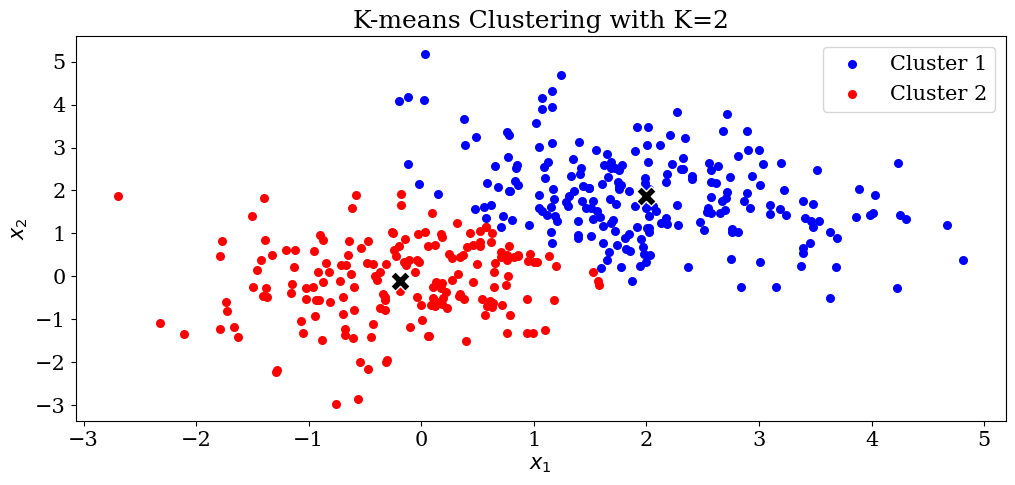

In [10]:
colors = ["blue", "red", "green", "orange", "purple"]

for k in range(K):
    plt.scatter(X[r == k, 0], X[r == k, 1], s=30, color=colors[k], label=f"Cluster {k+1}")
    plt.scatter(mu[k, 0], mu[k, 1], color="black", marker="X", s=200, edgecolors="white")

plt.title(f"K-means Clustering with K={K}")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.savefig("../img/optimisation_example_kmeans.pdf");

### 4. Minimising parametric functions

- **Example 1**: $f(x,y) = (x-1)^2 + (y+2)^2$

    Global minimum: $x, y = 1, -2$

- **Example 2**: $f(x,y) = (x^2-1)^2 + (y^2 -1)^2$

    Global minima: $\{x,y : x=+-1 \land y=+-1\}$

In [11]:
# Create a grid
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)

# 1. Convex quadratic (unique global minimum)
Z1 = (X - 1)**2 + (Y + 2)**2
minima1 = np.array([[1, -2]])

# 2. Multiple global minima
Z3 = (X**2 - 1)**2 + (Y**2 - 1)**2
minima2 = np.array([[1, 1], [-1, 1], [1, -1], [-1, -1]])

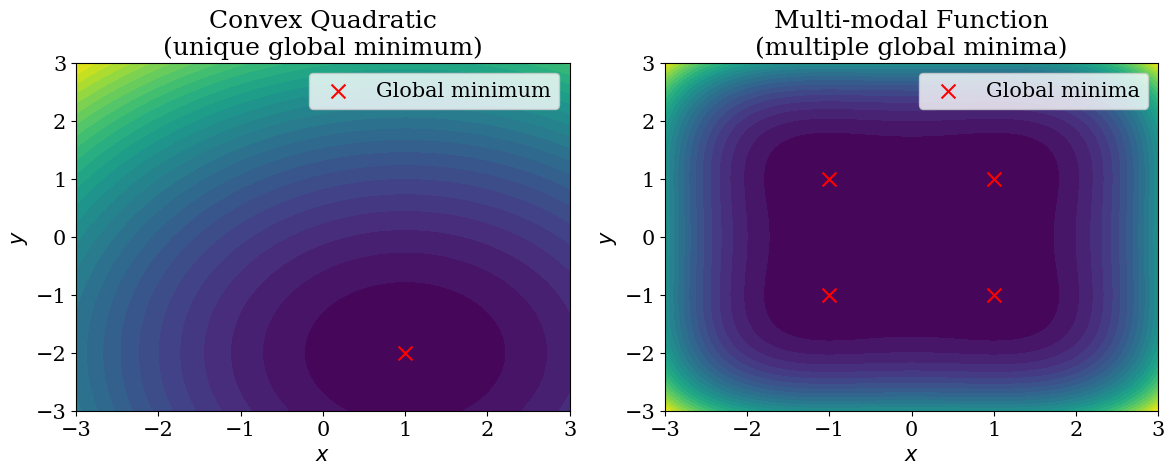

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# --- Function 1 ---
axs[0].contourf(X, Y, Z1, levels=30, cmap="viridis")
axs[0].scatter(minima1[:, 0], minima1[:, 1], color="red", marker="x", s=100, label="Global minimum")
axs[0].set_title("Convex Quadratic\n(unique global minimum)")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$y$")
axs[0].legend()

# --- Function 2 ---
axs[1].contourf(X, Y, Z3, levels=30, cmap="viridis")
axs[1].scatter(minima2[:, 0], minima2[:, 1], color="red", marker="x", s=100, label="Global minima")
axs[1].set_title("Multi-modal Function\n(multiple global minima)")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$y$")
axs[1].legend()

# Plotting
plt.tight_layout()
plt.savefig("../img/optimisation_example_2d_parametric.pdf");


## Constrained optimisation

Consider the function: $f(x,y) = sin(x)*sin(y) + 0.1(x^2+y^2)$

This function has local minima as well (i.e., non-convex) as a global minimum (within the range in which we are evaluating it). We can plot while pointing at the global minimum. Note that, just for this example, we are just taking the argmin of the function evaluated in our pre-defined grid. Normally we would want to perform optimisation either by having a closed form solution or with a numerical method.

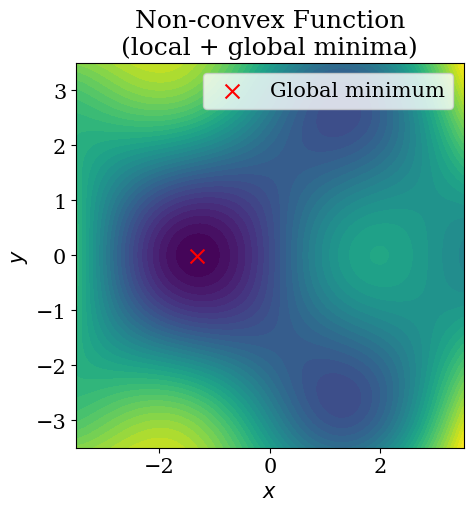

In [13]:
# Create a grid
x = np.linspace(-3.5, 3.5, 400)
y = np.linspace(-3.5, 3.5, 400)
X, Y = np.meshgrid(x, y)

# Non-convex with local minima
Z = np.sin(X) * np.cos(Y) + 0.1 * (X**2 + Y**2)

ix_min = np.unravel_index(np.argmin(Z), Z.shape)
minima = np.array([[X[ix_min], Y[ix_min]]])

plt.rcParams['figure.figsize'] = (5, 5)
plt.contourf(X, Y, Z, levels=40, cmap="viridis")
plt.scatter(minima[:, 0], minima[:, 1], color="red", marker="x", s=100, label="Global minimum")
plt.title("Non-convex Function\n(local + global minima)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.savefig("../img/optimisation_example_nonconvex.pdf")

We will now consider the case where we want to minimise the function but subject to $x$ and $y$ being within a predefined region. In this example, our feasible region will be defined by a circle:

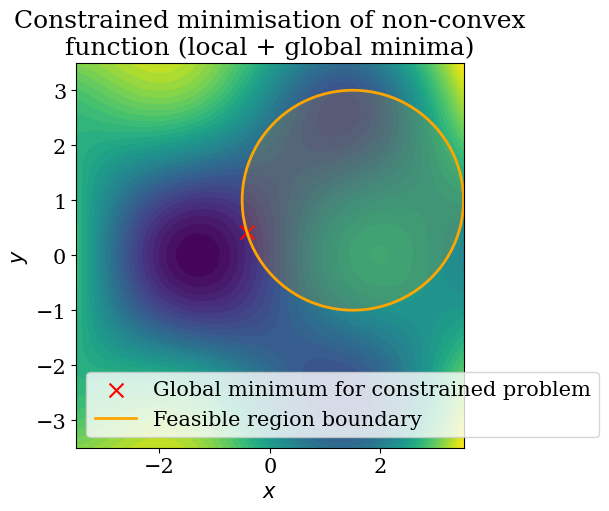

In [14]:
# Feasible region (circle)
x0, y0 = 1.5, 1  # centre
R = 2  # radius

# find minimum for constrained problem
mask = (X - x0)**2 + (Y - y0)**2 <= R**2
Z_masked = np.where(mask, Z, np.inf)
ix_min = np.unravel_index(np.argmin(Z_masked), Z_masked.shape)
minima2 = np.array([[X[ix_min], Y[ix_min]]])

plt.contourf(X, Y, Z, levels=40, cmap="viridis")
plt.scatter(minima2[:, 0], minima2[:, 1], color="red", marker="x", s=100, label="Global minimum for constrained problem")

# Highlighting the feasable region
theta = np.linspace(0, 2*np.pi, 200)
cx = x0 + R * np.cos(theta)
cy = y0 + R * np.sin(theta)
plt.plot(cx, cy, color='orange', linewidth=2, label='Feasible region boundary')
plt.fill(cx, cy, color='orange', alpha=0.15)

plt.title("Constrained minimisation of non-convex\nfunction (local + global minima)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.savefig("../img/optimisation_example_nonconvex_constrained.pdf")

> Exercise
> 
> a) Compute (an approximation of) the minimum of the unrestricted problem using the gradient descent method starting from the point $(1,0)$ and plot both the solution and the intermediate points followed by the algorithm. Comment on the speed of convergence.

> b) Explore alternative starting points for the gradient-based optimisation. What issues do you observe? Comment and propose solutions to this.

## Continuous unconstrained optimisation

### 1. Optimality conditions

Let $L$ be a twice differentiable function and denote $g(\theta) = \nabla_\theta L(\theta)$ and $H(\theta) = \nabla_\theta^2L(\theta)$, we can state the following optimality conditions. 

**First order necessary condition:** If $\theta_\star$ is a local minimum, then 
-  $\nabla_\theta L(\theta_\star)=0$

**Second order necessary condition:** If $\theta_\star$ is a local minimum, then 
- $\nabla_\theta L(\theta_\star)=0$
- $\nabla^ 2_\theta L(\theta_\star)$ is positive semidefinite

**Second order sufficient condition:** If $\theta_\star$ is a local minimum if and only if 
- $\nabla_\theta L(\theta_\star)=0$
- $\nabla^ 2_\theta L(\theta_\star)$ is positive definite

---
As an example consider the function
\begin{equation}
    x, y \mapsto f(x,y)=(p-1)x^2 + (p+1)y^2,\quad p\in\mathbb{R}
\end{equation}

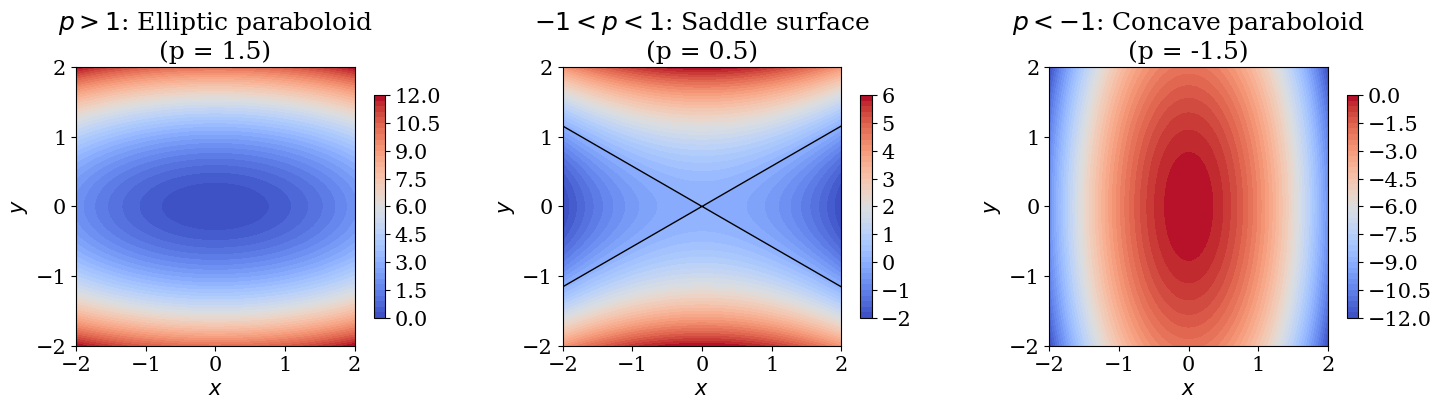

In [15]:
# Define the function
def f(x, y, p):
    return (p - 1) * x**2 + (p + 1) * y**2

# Grid
x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 2, 300)
X, Y = np.meshgrid(x, y)

# Three representative values of p
params = [1.5, 0.5, -1.5]
titles = [
    r"$p>1$: Elliptic paraboloid",
    r"$-1<p<1$: Saddle surface",
    r"$p<-1$: Concave paraboloid"
]

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for ax, p, title in zip(axs, params, titles):
    Z = f(X, Y, p)
    cs = ax.contourf(X, Y, Z, levels=40, cmap="coolwarm")
    ax.contour(X, Y, Z, levels=[0], colors="k", linewidths=1)
    ax.set_title(f"{title}\n(p = {p})")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_aspect("equal")
    fig.colorbar(cs, ax=ax, shrink=0.8)

plt.tight_layout()
plt.savefig("../img/optimisation_2d_critical_points.pdf");

> Exercises
>
> a) Compute (analytically) the gradient and the Hessian of $f$ at every point, as a function of $p$. What could be a good idea to visualise the effect of the gradient? Implement it and comment based on what you observe.

> b. What can be said about the point $(0,0)$? Separate by cases (conditions over $p$) and comment.

### 2. Convex optimisation

Convex optimisation corresponds to the case where we seek to find the minimum of a convex function over a convex domain.

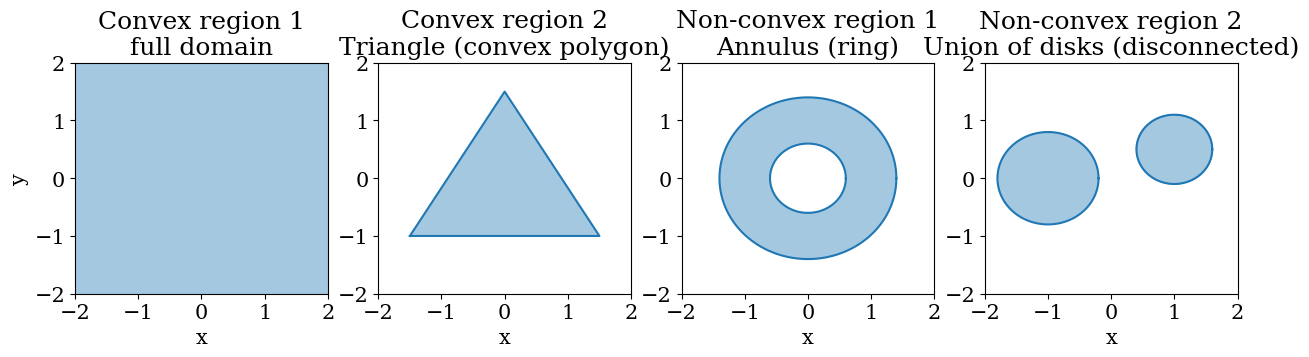

In [16]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))

# 1) Convex region A: full domain
polygon = np.array([[-2, -2],
                     [-2, 2],
                     [2,  -2],
                     [2, 2]])
tx = polygon[:,:2]; ty = polygon[:,2:]

axs[0].fill_between(np.linspace(-2,2,400), 2, -2, alpha=0.4)
axs[0].set_title("Convex region 1\nfull domain")
axs[0].set_xlim(-2, 2)
axs[0].set_ylim(-2, 2)
axs[0].set_xlabel('x'); axs[0].set_ylabel('y')

# 2) Convex region B: Triangle (convex polygon)
triangle = np.array([[ -1.5, -1.0],
                     [  1.5, -1.0],
                     [  0.0,  1.5]])
tx = triangle[:,0]; ty = triangle[:,1]

axs[1].fill(tx, ty, alpha=0.4)
axs[1].plot(np.append(tx, tx[0]), np.append(ty, ty[0]))  # close polygon
axs[1].set_title("Convex region 2\nTriangle (convex polygon)")
axs[1].set_xlim(-2, 2)
axs[1].set_ylim(-2, 2)
axs[1].set_xlabel('x');

# 3) Non-convex region A: Annulus (ring) - set difference of two disks
# Grid for plotting boundaries
theta = np.linspace(0, 2*np.pi, 400)
# defining two rings
cx2, cy2, r_inner, r_outer = 0.0, 0.0, 0.6, 1.4
x_outer = cx2 + r_outer * np.cos(theta)
y_outer = cy2 + r_outer * np.sin(theta)
x_inner = cx2 + r_inner * np.cos(theta)
y_inner = cy2 + r_inner * np.sin(theta)

axs[2].fill(x_outer, y_outer, alpha=0.4)
axs[2].fill(x_inner, y_inner, facecolor='white')
axs[2].plot(x_outer, y_outer)
axs[2].plot(x_inner, y_inner,c='tab:blue')
axs[2].set_title("Non-convex region 1\nAnnulus (ring)")
axs[2].set_xlim(-2, 2)
axs[2].set_ylim(-2, 2)
axs[2].set_xlabel('x');

# 4) Non-convex region B: Union of two disjoint disks
c1 = (-1.0, 0.0); r_a = 0.8
c2 = (1.0, 0.5); r_b = 0.6
x1 = c1[0] + r_a * np.cos(theta); y1 = c1[1] + r_a * np.sin(theta)
x2 = c2[0] + r_b * np.cos(theta); y2 = c2[1] + r_b * np.sin(theta)

axs[3].fill(x1, y1, alpha=0.4)
axs[3].fill(x2, y2, alpha=0.4,c='tab:blue')
axs[3].plot(x1, y1)
axs[3].plot(x2, y2,c='tab:blue')
axs[3].set_title("Non-convex region 2\nUnion of disks (disconnected)")
axs[3].set_xlim(-2, 2)
axs[3].set_ylim(-2, 2)
axs[3].set_xlabel('x')
plt.savefig("../img/optimisation_convex_and_nonconvex_regions.pdf");

**Other examples of convex functions in 1D**

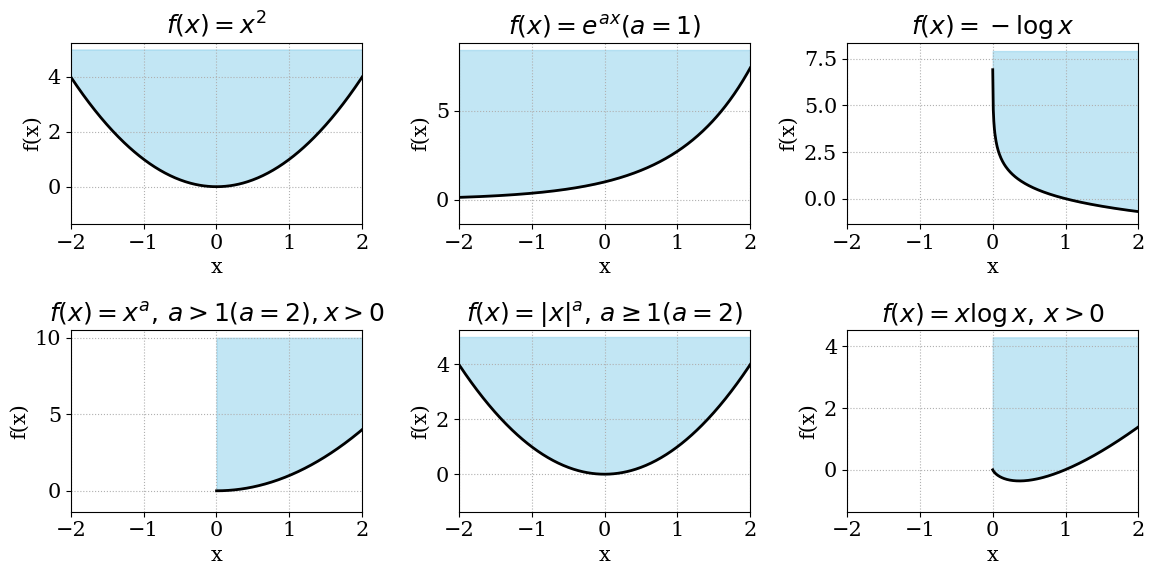

In [17]:
# Set up figure
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()

# Define domain and parameters
x1 = np.linspace(-2, 2, 400)
x_pos = np.linspace(1e-3, 3, 400)  # for x > 0 cases
a = 1.0  # can adjust for exponential and power cases

# 1. f(x) = x^2
f1 = x1**2
axes[0].plot(x1, f1, 'k', lw=2)
axes[0].fill_between(x1, f1, f1.max()+1, color='skyblue', alpha=0.5)
axes[0].set_title(r"$f(x) = x^2$")

# 2. f(x) = e^{a x}
f2 = np.exp(a * x1)
axes[1].plot(x1, f2, 'k', lw=2)
axes[1].fill_between(x1, f2, f2.max()+1, color='skyblue', alpha=0.5)
axes[1].set_title(r"$f(x) = e^{ax} (a=1)$")

# 3. f(x) = -\log x
f3 = -np.log(x_pos)
axes[2].plot(x_pos, f3, 'k', lw=2)
axes[2].fill_between(x_pos, f3, f3.max()+1, color='skyblue', alpha=0.5)
axes[2].set_title(r"$f(x) = -\log x$")

# 4. f(x) = x^a, a>1
a_power = 2
f4 = x_pos**a_power
axes[3].plot(x_pos, f4, 'k', lw=2)
axes[3].fill_between(x_pos, f4, f4.max()+1, color='skyblue', alpha=0.5)
axes[3].set_title(r"$f(x) = x^a,\, a>1 (a=2), x>0$")

# 5. f(x) = |x|^a, a≥1
f5 = np.abs(x1)**a_power
axes[4].plot(x1, f5, 'k', lw=2)
axes[4].fill_between(x1, f5, f5.max()+1, color='skyblue', alpha=0.5)
axes[4].set_title(r"$f(x) = |x|^a,\, a \geq 1 (a=2)$")

# 6. f(x) = x log x
f6 = x_pos * np.log(x_pos)
axes[5].plot(x_pos, f6, 'k', lw=2)
axes[5].fill_between(x_pos, f6, f6.max()+1, color='skyblue', alpha=0.5)
axes[5].set_title(r"$f(x) = x\log x,\, x>0$")

# Clean up
for ax in axes:
    ax.grid(True, ls=":")
    ax.set_xlim(x1.min(), x1.max())
    ax.set_ylim(bottom=min(f6.min(), f1.min()) - 1)
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")

plt.tight_layout()
plt.savefig("../img/optimisation_convex_1d_examples.pdf");

**Role of the step size**

Let's in an example how the learning rate affects the convergence speed.

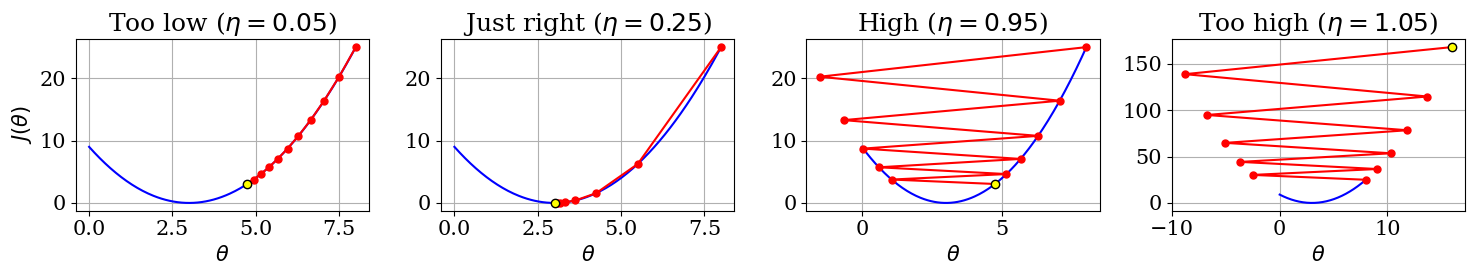

In [18]:
# Define the function and its gradient
def J(theta):
    return (theta - 3)**2

def dJ(theta):
    return 2 * (theta - 3)

# Learning rates
etas = [0.05, 0.25, 0.95, 1.05]  # too low, just right, too high
labels = [r"Too low ($\eta = 0.05$)", r"Just right ($\eta=0.25$)", r"High ($\eta=0.95$)", r"Too high ($\eta=1.05$)"]

# Gradient descent
theta0 = 8.0
steps = 10

plt.figure(figsize=(15,3))
theta_vals = np.linspace(0, 8, 200)
J_vals = J(theta_vals)

for i, eta in enumerate(etas):
    thetas = [theta0]
    for _ in range(steps):
        theta_new = thetas[-1] - eta * dJ(thetas[-1])
        thetas.append(theta_new)

    plt.subplot(1, len(etas), i+1)
    plt.plot(theta_vals, J_vals, 'b-', linewidth=1.5)
    plt.plot(thetas, J(np.array(thetas)), 'r.-', markersize=10)
    plt.scatter(thetas[-1], J(thetas[-1]), color='yellow', edgecolor='black', zorder=5)
    plt.title(labels[i])
    plt.xlabel(r"$\theta$")
    if i == 0:
        plt.ylabel(r"$J(\theta)$")
    plt.grid(True)
    # plt.ylim([-1,40])

plt.tight_layout()
plt.savefig("../img/optimisation_parabola_lr.pdf");

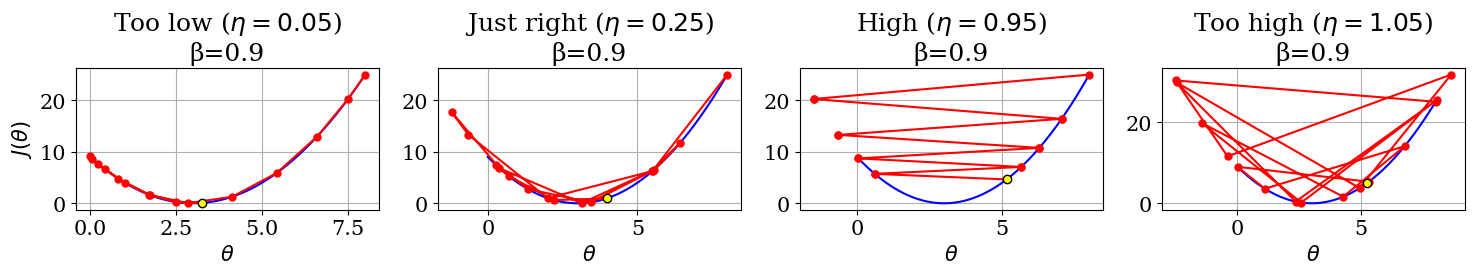

In [19]:
# Parameters
beta = 0.9
theta0 = 8.0
steps = 15

theta_vals = np.linspace(0, 8, 200)
J_vals = J(theta_vals)

plt.figure(figsize=(15,3))

for i, eta in enumerate(etas):
    thetas = [theta0]
    v = 0
    for _ in range(steps):
        grad = dJ(thetas[-1])
        v = beta * v + eta * grad     # momentum update
        theta_new = thetas[-1] - v
        thetas.append(theta_new)

    plt.subplot(1, len(etas), i+1)
    plt.plot(theta_vals, J_vals, 'b-', linewidth=1.5)
    plt.plot(thetas, J(np.array(thetas)), 'r.-', markersize=10)
    plt.scatter(thetas[-1], J(thetas[-1]), color='yellow', edgecolor='black', zorder=5)
    plt.title(f"{labels[i]}\nβ={beta}")
    plt.xlabel(r"$\theta$")
    if i == 0:
        plt.ylabel(r"$J(\theta)$")
    plt.grid(True)

plt.tight_layout()
plt.savefig("../img/optimisation_parabola_momentum.pdf");

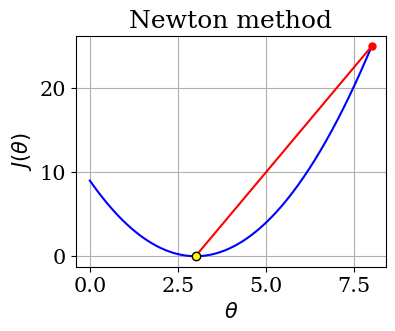

In [20]:
def ddJ(theta):
    return 2.0  # constant Hessian

theta0 = 8.0
steps = 5

theta_vals = np.linspace(0, 8, 200)
J_vals = J(theta_vals)

eta = 1
thetas = [theta0]
grad = dJ(thetas[-1])
hess = ddJ(thetas[-1])
theta_new = thetas[-1] - eta * grad / hess
thetas.append(theta_new)

plt.rcParams['figure.figsize'] = (4, 3)
plt.plot(theta_vals, J_vals, 'b-', linewidth=1.5)
plt.plot(thetas, J(np.array(thetas)), 'r.-', markersize=10)
plt.scatter(thetas[-1], J(thetas[-1]), color='yellow', edgecolor='black', zorder=5)
plt.title("Newton method")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.savefig("../img/optimisation_parabola_newton.pdf");

### Stochastic gradient descent

In stochastic optimisation we minimise the random loss function:
\begin{equation}
	L(x) = \mathbb{E}_{q(z)}L(x,z).
\end{equation}

We do so via the empirical loss $L(\theta) = \frac{1}{N}\sum_{i=1}^n(y_i-\theta^\top x_i)^2$.

We will introduce a toy example of linear regression where $q(y|x) = \mathcal{N}(y;x,\sigma^2)$ for a given $\sigma >0$. Consequently, we can compare the true expectation with the empirical approximation for increasing values of $N$.

In [21]:
import matplotlib.pyplot as plt
import numpy as np

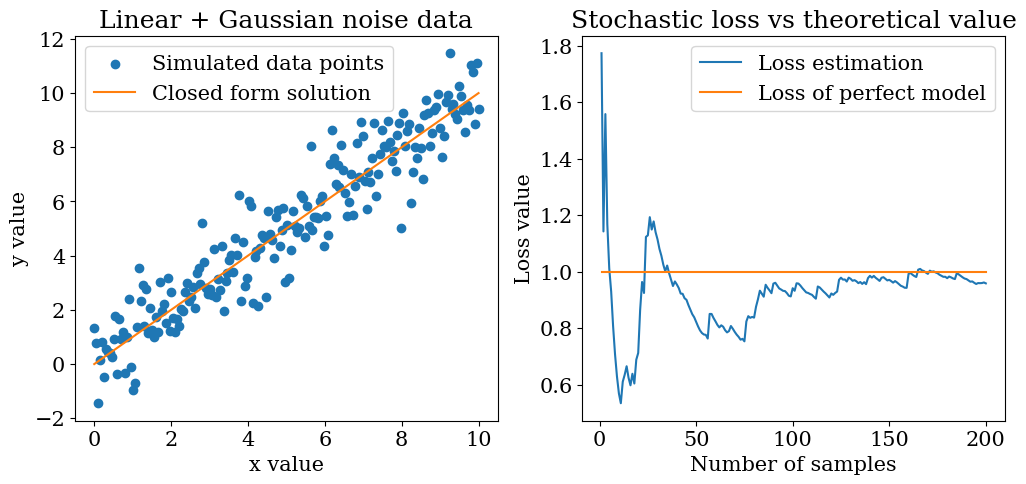

In [22]:
# Generate
N = 200
std = 1
x = np.linspace(0,10,N)
np.random.seed(10)
y = x + np.random.normal(scale=std,size=N)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(x,y,label="Simulated data points")
axs[0].plot(x,x,label="Closed form solution",c='tab:orange')
axs[0].set_ylabel("y value")
axs[0].set_xlabel("x value")
axs[0].set_title("Linear + Gaussian noise data")
axs[0].legend()

emp_loss, loss_est = [], []
for i in range(N):
    emp_loss.append((y[i]-x[i])**2)
    loss_est.append(np.mean(emp_loss))

axs[1].plot(range(1,N+1),loss_est,label="Loss estimation")
axs[1].plot(range(1,N+1),[std**2 for _ in range(N)],label="Loss of perfect model")
axs[1].set_xlabel('Number of samples')
axs[1].set_ylabel('Loss value')
axs[1].legend()
axs[1].set_title('Stochastic loss vs theoretical value')
plt.savefig("../img/optimisation_toy_SGD.pdf");

**Optimisers in deep learning**

We will have a look at the effect of different optimisers that are commonly used in machine learning:
- Stochastic gradient descent
- Adagrad
- RMSprop
- Adam

For this, we will consider the function $f(x,y)=0.1 x^2 + y^2$. Notice that this function is convex, hence we would expect a reasonable gradient based method to converge. However, the speed and way in which they will converge will be different in every case. This functions serves to show this, especially because the curvature is much more pronounced along the $y$ axis.

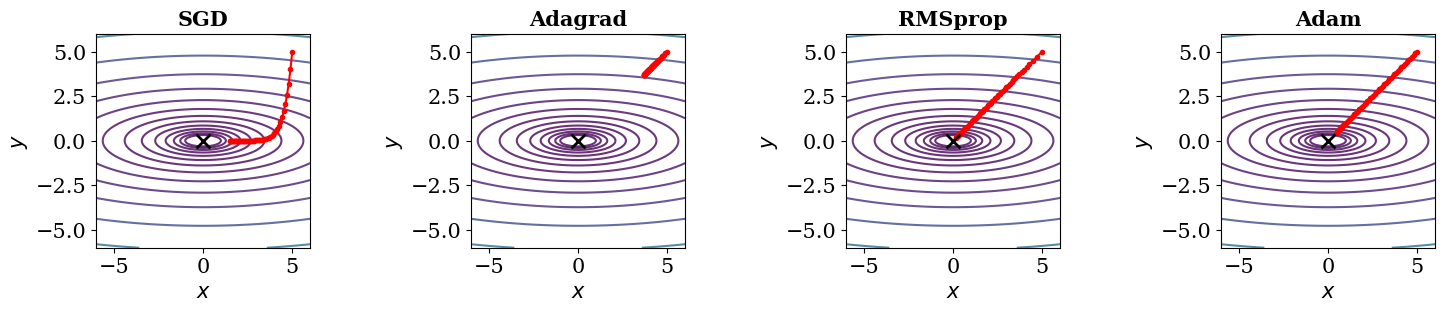

In [23]:
import torch

# Function and gradient (in PyTorch)
def f(w):
    x, y = w[0], w[1]
    return 0.1 * x**2 + y**2

# Initial point
w0 = torch.tensor([5.0, 5.0])

# Number of iterations
steps = 60

# Learning rate
eta = 0.1

# Define optimizers (PyTorch)
def make_optimizer(opt_name, w):
    if opt_name == 'SGD':
        return torch.optim.SGD([w], lr=eta)
    elif opt_name == 'Adagrad':
        return torch.optim.Adagrad([w], lr=eta)
    elif opt_name == 'RMSprop':
        return torch.optim.RMSprop([w], lr=eta, alpha=0.9)
    elif opt_name == 'Adam':
        return torch.optim.Adam([w], lr=eta, betas=(0.9, 0.999))
    else:
        raise ValueError("Unknown optimizer")

optim_names = ['SGD', 'Adagrad', 'RMSprop', 'Adam']
paths = {}

for name in optim_names:
    w = w0.clone().detach().requires_grad_(True)
    opt = make_optimizer(name, w)
    path = [w.detach().numpy().copy()]

    for _ in range(steps):
        opt.zero_grad()
        loss = f(w)
        loss.backward()
        opt.step()
        path.append(w.detach().numpy().copy())

    paths[name] = np.array(path)

# Prepare contour surface
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = 0.1 * X**2 + Y**2

# Plot
fig, axes = plt.subplots(1, 4, figsize=(15, 3), constrained_layout=True)

for ax, name in zip(axes, optim_names):
    CS = ax.contour(X, Y, Z, levels=np.logspace(-1, 2, 15), cmap='viridis', alpha=0.8)
    path = paths[name]
    ax.plot(path[:, 0], path[:, 1], 'o-', color='red', markersize=3, linewidth=1.5)
    ax.plot(0, 0, 'kx', markersize=10, markeredgewidth=2)  # global minimum
    ax.set_title(name, fontsize=15, fontweight='bold')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_aspect('equal')
    ax.grid(False)

# plt.suptitle("Comparison of PyTorch Optimizers on Anisotropic Quadratic", fontsize=14, y=1.05)
plt.savefig("../img/optimisation_optimisers_comparison.pdf");

> Exercises
>
> The optimiser Adam updates:
>
> $m_t = \beta_m m_{t-1} + (1-\beta_m) g_{t}$
>
> $s_t = \beta_s s_{t-1} + (1-\beta_s) g^2_{t}.$
>
> $\theta_{t} = \theta_{t-1} - \eta_t \frac{m_t}{\sqrt{s_t} + \epsilon}$
> 
> a) Implement this by hand.

> b) Compare with SGD when minimising the function $(\theta - 3)^2$ used above with various learning rates. Plot results and comment.

> c) Download a [dataset](https://www.kaggle.com/datasets) (e.g., for classification) and implement a linear model. Clearly state which loss will be minimised and compare some of the optimisers/methods described in this notebook. What are their advantages and their dissadvantages? Comment.